## Ejercicio 3
Indique qué tipo de información brindan las siguientes representaciones gráficas:

* Diagrama de Barras: Muestra la cantidad o frecuencia de diferentes categorías mediante la altura de barras separadas.
* Histograma: Muestra la distribución de una variable numérica continua, indicando qué rangos de valores son más comunes.
* Diagrama de Caja: Resume la dispersión central de los datos (mediana, cuartiles) y señala los valores atípicos (outliers).
* Diagrama de Dispersión: Muestra la relación y tendencia entre dos variables numéricas mediante puntos en un plano cartesiano.

Luego, genere al menos un ejemplo de cada representación usando el dataset de obesidad y explique cómo interpretar cada uno.

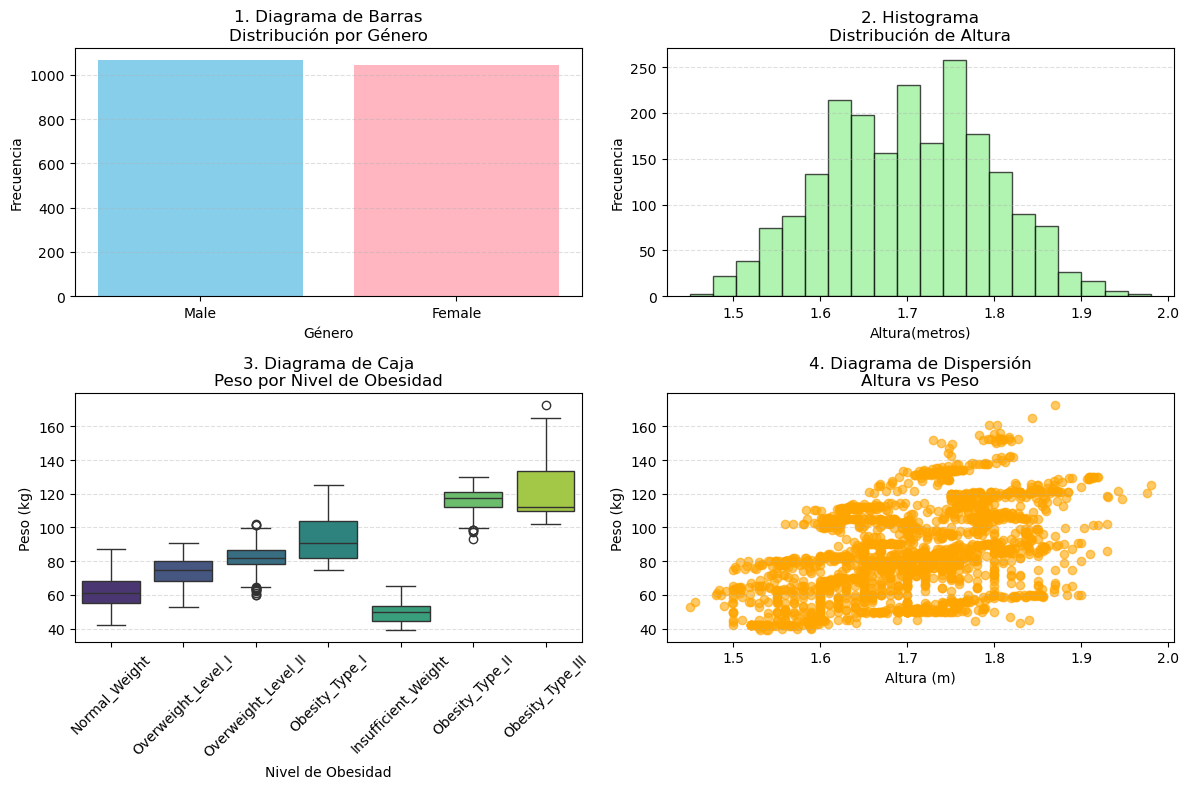

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/pymche/Machine-Learning-Obesity-Classification/refs/heads/master/ObesityDataSet_raw_and_data_sinthetic.csv")
# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. Diagrama de Barras - Género
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightpink'])
plt.title('1. Diagrama de Barras\nDistribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 2. Histograma - ALtura
plt.subplot(2, 2, 2)
plt.hist(df['Height'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('2. Histograma\nDistribución de Altura')
plt.xlabel('Altura(metros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 3. Diagrama de Caja - Peso por Obesidad
plt.subplot(2, 2, 3)
sns.boxplot(x='NObeyesdad', y='Weight', data=df, hue='NObeyesdad', palette='viridis', legend=False)
plt.title('3. Diagrama de Caja\nPeso por Nivel de Obesidad')
plt.xlabel('Nivel de Obesidad')
plt.ylabel('Peso (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 4. Diagrama de Dispersión - Altura vs Peso
plt.subplot(2, 2, 4)
plt.scatter(df['Height'], df['Weight'], alpha=0.6, color='orange')
plt.title('4. Diagrama de Dispersión\nAltura vs Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(axis='y',alpha=0.4, linestyle='--')


plt.tight_layout()
plt.show()

## Ejercicio 4
Complete el siguiente cuadro y dibuje el diagrama de caja del atributo “weight”:

* Mínimo
* Máximo
* Q1
* Q2 o mediana
* Q3
* RIC
* Bigote superior
* Bigote inferior
* Intervalos de valores atípicos leves
* Valores atípicos leves
* Intervalos de valores atípicos extremos
* Valores atípicos extremos



#### calculos de valores estadisticos

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular medidas estadísticas para Weight
weight_data = df['Weight']
q1 = weight_data.quantile(0.25)
q2 = weight_data.quantile(0.50)  # Mediana
q3 = weight_data.quantile(0.75)
iqr = q3 - q1

# Bigotes (1.5 * IQR)
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

# Identificar valores atípicos
mild_outliers_lower = weight_data[(weight_data < lower_whisker) & (weight_data >= q1 - 3 * iqr)]
mild_outliers_upper = weight_data[(weight_data > upper_whisker) & (weight_data <= q3 + 3 * iqr)]
extreme_outliers_lower = weight_data[weight_data < q1 - 3 * iqr]
extreme_outliers_upper = weight_data[weight_data > q3 + 3 * iqr]

print("Medidas estadísticas del atributo 'Weight':")
print(f"Mínimo.........: {weight_data.min():.2f} kg")
print(f"Máximo.........: {weight_data.max():.2f} kg")
print(f"Q1.............: {q1:.2f} kg")
print(f"Q2 (Mediana)...: {q2:.2f} kg")
print(f"Q3.............: {q3:.2f} kg")
print(f"RIC............: {iqr:.2f} kg")
print(f"Bigote inferior: {lower_whisker:.2f} kg")
print(f"Bigote superior: {upper_whisker:.2f} kg")

Medidas estadísticas del atributo 'Weight':
Mínimo.........: 39.00 kg
Máximo.........: 173.00 kg
Q1.............: 65.47 kg
Q2 (Mediana)...: 83.00 kg
Q3.............: 107.43 kg
RIC............: 41.96 kg
Bigote inferior: 2.54 kg
Bigote superior: 170.37 kg


173.0


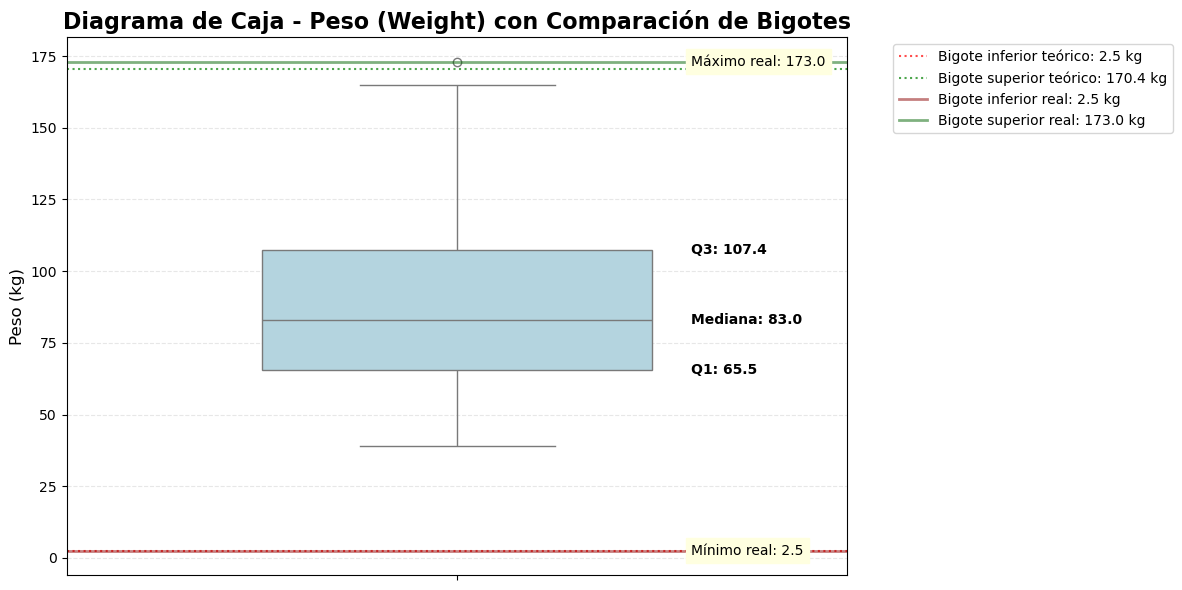

In [14]:
# Calcular medidas
weight_data = df['Weight'].dropna()
q1 = weight_data.quantile(0.25)
q2 = weight_data.quantile(0.50)
q3 = weight_data.quantile(0.75)
iqr = q3 - q1

# Bigotes teóricos
lower_whisker_theoretical = q1 - 1.5 * iqr
upper_whisker_theoretical = q3 + 1.5 * iqr

# Bigotes reales
lower_whisker_real = min(weight_data.min(), lower_whisker_theoretical)
upper_whisker_real = max(weight_data.max(), upper_whisker_theoretical)

print(weight_data.max())
# Configurar el estilo
plt.figure(figsize=(12, 6))
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.3

# Crear diagrama de caja
sns.boxplot(y=weight_data, color='lightblue', width=0.5)
plt.title('Diagrama de Caja - Peso (Weight) con Comparación de Bigotes',
          fontsize=16, fontweight='bold')
plt.ylabel('Peso (kg)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Líneas de referencia para bigotes TEÓRICOS
plt.axhline(y=lower_whisker_theoretical, color='red', linestyle=':', alpha=0.7,
           label=f'Bigote inferior teórico: {lower_whisker_theoretical:.1f} kg')
plt.axhline(y=upper_whisker_theoretical, color='green', linestyle=':', alpha=0.7,
           label=f'Bigote superior teórico: {upper_whisker_theoretical:.1f} kg')

# Líneas para bigotes REALES
plt.axhline(y=lower_whisker_real, color='darkred', linestyle='-', alpha=0.5, linewidth=2,
           label=f'Bigote inferior real: {lower_whisker_real:.1f} kg')
plt.axhline(y=upper_whisker_real, color='darkgreen', linestyle='-', alpha=0.5, linewidth=2,
           label=f'Bigote superior real: {upper_whisker_real:.1f} kg')

# Anotaciones
plt.text(0.3, q1, f'Q1: {q1:.1f}', ha='left', va='center',
         backgroundcolor='white', fontweight='bold')
plt.text(0.3, q2, f'Mediana: {q2:.1f}', ha='left', va='center',
         backgroundcolor='white', fontweight='bold')
plt.text(0.3, q3, f'Q3: {q3:.1f}', ha='left', va='center',
         backgroundcolor='white', fontweight='bold')

plt.text(0.3, lower_whisker_real, f'Mínimo real: {lower_whisker_real:.1f}',
         ha='left', va='center', backgroundcolor='lightyellow')
plt.text(0.3, upper_whisker_real, f'Máximo real: {upper_whisker_real:.1f}',
         ha='left', va='center', backgroundcolor='lightyellow')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Ejercicio 4
Los valores del atributo peso (“weight”) fueron agrupados según el atributo de antecedente de obesidad
familiar (“family_history_with_overweight”). La figura muestra los diagramas de caja correspondientes.

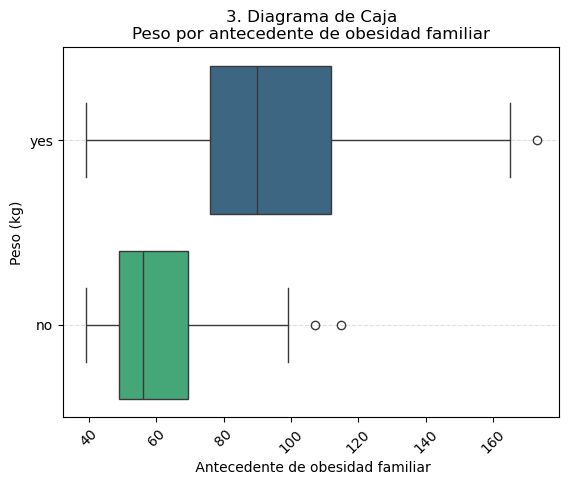

In [17]:
# 3. Diagrama de Caja - Antecedente de obesidad familiar
sns.boxplot(x='Weight', y='family_history_with_overweight', data=df, hue='family_history_with_overweight', palette='viridis', legend=False)
plt.title('3. Diagrama de Caja\nPeso por antecedente de obesidad familiar')
plt.xlabel(' Antecedente de obesidad familiar')
plt.ylabel('Peso (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y',alpha=0.4, linestyle='--')

In [19]:
# Calcular medidas de los valores estadisticos que tengan antecedentes familiares
df_con_antecedentes = df[df['family_history_with_overweight'] == 'yes']
weight_con_antecedentes = df_con_antecedentes['Weight'].dropna()
q1 = weight_con_antecedentes.quantile(0.25)
q2 = weight_con_antecedentes.quantile(0.50)
q3 = weight_con_antecedentes.quantile(0.75)
iqr = q3 - q1

# Bigotes teóricos
limite_inferior = q1 - 1.5 * iqr
limite_superior= q3 + 1.5 * iqr

print("Medidas estadísticas del atributo 'Weight' CON ANTECEDENTES FAMILIARES:")
print(f"Mínimo.........: {weight_con_antecedentes.min():.2f} kg")
print(f"Máximo.........: {weight_con_antecedentes.max():.2f} kg")
print(f"Q1.............: {q1:.2f} kg")
print(f"Q2 (Mediana)...: {q2:.2f} kg")
print(f"Q3.............: {q3:.2f} kg")
print(f"RIC............: {iqr:.2f} kg")
print(f"Bigote inferior: {limite_inferior:.2f} kg")
print(f"Bigote superior: {limite_superior:.2f} kg")


Medidas estadísticas del atributo 'Weight' CON ANTECEDENTES FAMILIARES:
Mínimo.........: 39.00 kg
Máximo.........: 173.00 kg
Q1.............: 75.85 kg
Q2 (Mediana)...: 89.99 kg
Q3.............: 111.84 kg
RIC............: 35.99 kg
Bigote inferior: 21.87 kg
Bigote superior: 165.82 kg


In [23]:
# Calcular medidas de los valores estadisticos que no tengan antecedentes familiares
df_sin_antecedentes = df[df['family_history_with_overweight'] == 'no']
weight_sin_antecedentes = df_sin_antecedentes['Weight'].dropna()
q1 = weight_sin_antecedentes.quantile(0.25)
q2 = weight_sin_antecedentes.quantile(0.50)
q3 = weight_sin_antecedentes.quantile(0.75)
iqr = q3 - q1

# Bigotes teóricos
limite_inferior = q1 - 1.5 * iqr
limite_superior= q3 + 1.5 * iqr

print("Medidas estadísticas del atributo 'Weight' CON ANTECEDENTES FAMILIARES:")
print(f"Mínimo.........: {weight_sin_antecedentes.min():.2f} kg")
print(f"Máximo.........: {weight_sin_antecedentes.max():.2f} kg")
print(f"Q1.............: {q1:.2f} kg")
print(f"Q2 (Mediana)...: {q2:.2f} kg")
print(f"Q3.............: {q3:.2f} kg")
print(f"RIC............: {iqr:.2f} kg")
print(f"Bigote inferior: {limite_inferior:.2f} kg")
print(f"Bigote superior: {limite_superior:.2f} kg")


Medidas estadísticas del atributo 'Weight' CON ANTECEDENTES FAMILIARES:
Mínimo.........: 39.10 kg
Máximo.........: 115.00 kg
Q1.............: 49.04 kg
Q2 (Mediana)...: 56.00 kg
Q3.............: 69.50 kg
RIC............: 20.46 kg
Bigote inferior: 18.35 kg
Bigote superior: 100.19 kg


##### a) Al menos el 25% de las personas con antecedentes familiares de obesidad pesan más de 100 kg.Verdadero b) Es atípico que una persona sin antecedentes familiares de obesidad (no) pese más de 115 kg.Falso c) La mediana del peso de las personas sin antecedentes familiares (no) es menor que 60 kg.Verdadero d) Todos los valores atípicos para personas con antecedentes familiares de obesidad son leves.Falso

## Ejercicio 6
Discretice el atributo del consumo de agua diario en litros (“CH2O”) en tres intervalos: Bajo, Medio y Alto.
Indique en la tabla los intervalos utilizados y la cantidad respectivas de ejemplos de cada uno al discretizar
por rango y por intervalo. Luego, explique porque los ejemplos no quedaron divididos en intervalos con la
misma cantidad de valores

In [43]:
##Discretizacion por rango
CH2O_range = pd.qcut(df['CH2O'], q=3)  # 3 grupos con similar cantidad de datos
range_counts = CH2O_range.value_counts().sort_index()

# Convertimos a DataFrame y agregamos columna con etiquetas (SOLO PARA VISUALIZACION)
range_counts = range_counts.to_frame(name='frecuencia')
range_counts['valor'] = ['Bajo', 'Medio', 'Alto']
range_counts


,frecuencia,valor
CH2O,,
"(0.999, 1.92]",704,Bajo
"(1.92, 2.185]",703,Medio
"(2.185, 3.0]",704,Alto


In [44]:
#Disretizacion por frecuencia
CH2O_frecuencia = pd.cut(df['CH2O'], bins=3) #tres intervalos de igual anccho
frecuencia_counts = CH2O_frecuencia.value_counts().sort_index()

# Convertimos a DataFrame y agregamos columna con etiquetas (SOLO PARA VISUALIZACION)
frecuencia_counts = frecuencia_counts.to_frame(name='frecuencia')
frecuencia_counts['valor'] = ['Bajo', 'Medio', 'Alto']
frecuencia_counts



,frecuencia,valor
CH2O,,
"(0.998, 1.667]",576,Bajo
"(1.667, 2.333]",910,Medio
"(2.333, 3.0]",625,Alto


## Ejercicio 7 


In [ ]:
Realice las siguientes tareas para preparar el dataset para que pueda ser utilizado para entrenar modelos de
redes neuronales.

a) Visualice las primeras 5 filas y el resumen estadístico.
b) Identifique los atributos (columnas) con valores nulos y su porcentaje.
c) Analizar los valores faltantes y discutir cuales serían las alternativas posibles para tratarlos.
d) Los nombres de los pasajeros van acompañados de títulos que pueden ser importantes para la
interpretación de los datos o para completar información faltante:
i. Extrae el título (como Mr, Miss, Mrs, Master, etc.) del nombre de cada pasajero y crea una nueva
columna llamada Title.
ii. Unifica los valores para que queden Mr, Miss (Mlle, Ms), Mrs (Mme), Master, Others (resto).
iii. Computa las edades faltantes utilizando la edad promedio por categoría.
e) Complete los valores faltantes utilizando las estrategias planteadas en los puntos anteriores.
f) Cree un nuevo atributo FamilySize que contabiliza los integrantes de familia a partir de los atributos
SibSp (hermanos y esposo) y Parch (padres e hijos). No olvidar contar a la persona.
g) Numerice los atributos categóricos: Sex, Embarked, y Title.
h) Discuta y responda ¿Por qué one-hot encoding podría ser preferible a label encoding para el atributo
Pclass?
i) Visualiza distribuciones: Histograma de Age, gráfico de barras para Survived por Sex y Pclass.


#### Ejercicio a)

In [86]:

url="https://raw.githubusercontent.com/aap-unlp/datasets/main/titanic/titanic.csv"
df=pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Ejercicio b)

In [88]:
print("Valores faltantes por columna\n")
totalNulos=df.isnull().sum()
display(totalNulos)

Valores faltantes por columna



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
porcentajeNulos=(totalNulos/len(df))*100
print("porcentaje de valores faltantes por columna\n")
display(porcentajeNulos)

porcentaje de valores faltantes por columna



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Ejercicio c)

##### Podriamos promediar la edad en las filas faltantes,completar aleatoriamente los valores faltantes del numero de cabina, y  eliminar las filas que tengan valor faltante en la columna de "Puerta de embarque" ya que son pocas.

#### Ejercicio d)

In [90]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [91]:
df['Title'] = df['Name'].str.extract(r', ([^\.]+)\.', expand=False)

display(df['Title'])

# Mostrar resultados
print("Títulos extraídos:")
print(df['Title'].value_counts())

# Mostrar algunas filas para verificar
print("\nPrimeras filas con el nuevo campo:")
print(df[['Name', 'Title']].head(10))


# Verificar cuántos NO tienen título (son NaN)
missing_titles = df['Title'].isnull().sum()
print(f"\nNúmero de filas sin título: {missing_titles}")



0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

Títulos extraídos:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

Primeras filas con el nuevo campo:
                                                Name   Title
0                            Braund, Mr. Owen Harris      Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                             Heikkinen, Miss. Laina    Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                           Allen, Mr. William Henry      Mr
5                                   Moran, Mr. James      Mr
6                            McCarthy, Mr. Timothy J      Mr
7                     Palsson, Master. Gosta Leonard  Master
8  Johnson, Mrs. Oscar W

In [92]:
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})

# Agrupar todos los títulos poco frecuentes en 'Other'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Lady', 'Countess',
               'the Countess', 'Don', 'Dona', 'Jonkheer']

df['Title'] = df['Title'].replace(rare_titles, 'Other')

display(df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

In [93]:
#completando las edades faltantes con el pormedio de los demas
df["Age"]=df["Age"].fillna(df.groupby('Title')["Age"].transform("mean"))

In [94]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

#### Ejercicio f)

In [95]:
# Crear FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Crear IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Verificar
display(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head(8))


,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1
5,0,0,1,1
6,0,0,1,1
7,3,1,5,0


#### Ejercicio g)

In [103]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=False)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'IsAlone', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other'],
      dtype='object')

In [104]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,...,False,True,False,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,...,True,False,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,...,True,False,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,...,True,False,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,...,False,True,False,False,True,False,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,...,True,False,False,False,True,False,True,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.845638,1,2,W./C. 6607,23.4500,NaN,...,True,False,False,False,True,False,True,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,...,False,True,True,False,False,False,False,True,False,False


#### Ejercicio i)

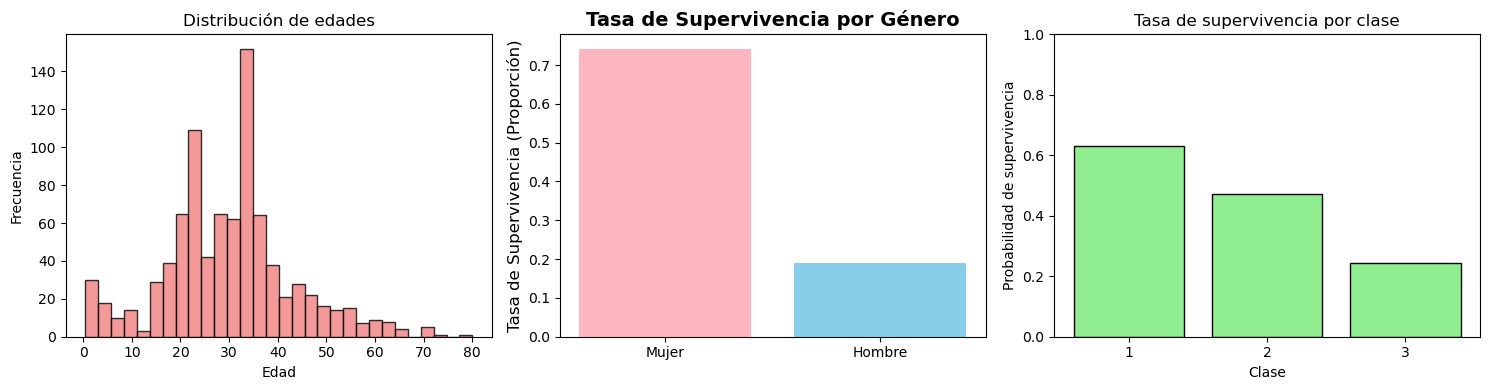

In [111]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Histograma de Age
ax[0].hist(df['Age'].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.8)
ax[0].set_title('Distribución de edades')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Frecuencia')

# 1. Filtrado corregido (usando 1 en lugar de 'true')
tasa_femenina = df[df['Sex_female'] == True]['Survived'].mean()
tasa_masculina = df[df['Sex_male'] == 1
]['Survived'].mean()

datos_resumen = pd.DataFrame({
    'Género': ['Mujer', 'Hombre'],
    'Tasa de Supervivencia': [tasa_femenina, tasa_masculina]
})

ax[1].bar(
    x=datos_resumen['Género'],
    height=datos_resumen['Tasa de Supervivencia'], 
    color=['lightpink', 'skyblue']
) 

# Corrección del método del título
ax[1].set_title('Tasa de Supervivencia por Género', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Tasa de Supervivencia (Proporción)', fontsize=12)

# Survived por Pclass
pclass_surv = df.groupby('Pclass')['Survived'].mean()
ax[2].bar(pclass_surv.index, pclass_surv.values, color='lightgreen', edgecolor='black')
ax[2].set_title('Tasa de supervivencia por clase')
ax[2].set_ylabel('Probabilidad de supervivencia')
ax[2].set_xlabel('Clase')
ax[2].set_xticks([1, 2, 3])
ax[2].set_ylim(0, 1)


plt.tight_layout()
plt.show()

### Ejercicio 8

In [113]:
print("La correlacion lineal entre La tarifa y la clase de ticket es:")
print(df["Fare"].corr(df["Pclass"]))


La correlacion lineal entre La tarifa y la clase de ticket es:
-0.5494996199439081


### Ejercicio 9

In [120]:
url="automobile.csv"
df=pd.read_csv(url)

In [121]:
df

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [122]:
df.describe()

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
count,205.000000,205.000000,203.000000,205.000000,205.000000,201.000000,205.000000,205.000000
mean,2555.565854,126.907317,104.256158,25.219512,30.751220,13207.129353,618719.288873,42.235315
std,520.680204,41.642693,39.714369,6.542142,6.886443,7947.066342,79463.195262,12.299628
min,1488.000000,61.000000,48.000000,13.000000,16.000000,5118.000000,452643.156000,15.501957
25%,2145.000000,97.000000,70.000000,19.000000,25.000000,7775.000000,566490.600000,31.972844
50%,2414.000000,120.000000,95.000000,24.000000,30.000000,10295.000000,601385.700000,40.619311
75%,2935.000000,141.000000,116.000000,30.000000,34.000000,16500.000000,666250.200000,50.771660
max,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000,846007.659000,83.088774


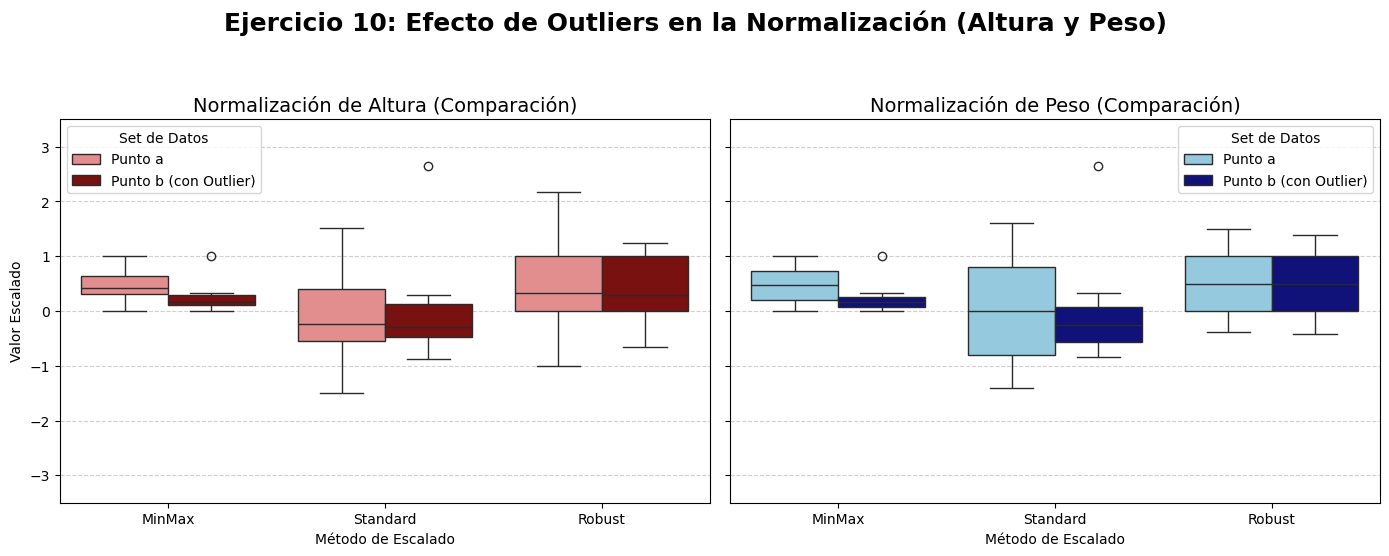


Punto c) Comentario de las Diferencias entre A y B

La adición del punto atípico (2.20, 120) demuestra la sensibilidad de los escaladores:

1. 🔴 MinMax Scaler:
   - Mayor sensibilidad. Al incluir el nuevo valor máximo (2.20m o 120kg), el rango (denominador) se estira enormemente.
   - Resultado: La caja (el 90% de los datos originales) se comprime hacia el límite 0.0, reduciendo drásticamente la varianza aparente. **Evitar con outliers.**

2. 🟡 Standard Scaler (Z-Score):
   - Sensibilidad media. El outlier distorsiona la media (tira del centro) y aumenta la desviación estándar.
   - Resultado: La distribución completa se desplaza y se comprime ligeramente, ya que el outlier impacta ambas métricas centrales de la fórmula.

3. 🟢 Robust Scaler:
   - Mínima sensibilidad. Utiliza la Mediana y el IQR (Q3-Q1), que no son afectados por valores extremos.
   - Resultado: Las cajas Q1-Q3 mantienen su forma y dispersión relativas casi idénticas en el Punto b. El outlier se escala a un valor extre

In [130]:
# Datos iniciales (Punto a)
data_a = {
    'Altura': [1.65, 1.81, 1.70, 1.62, 1.74, 1.70, 1.80, 1.73, 1.68],
    'Peso': [75, 86, 82, 78, 77, 87, 90, 83, 80]
}
df_a = pd.DataFrame(data_a)

# Datos con el nuevo punto agregado (Punto b)
data_b = {
    'Altura': [1.65, 1.81, 1.70, 1.62, 1.74, 1.70, 1.80, 1.73, 1.68, 2.20], # Outlier 2.20
    'Peso': [75, 86, 82, 78, 77, 87, 90, 83, 80, 120]                       # Outlier 120
}
df_b = pd.DataFrame(data_b)

# --- Funciones de Normalización Manual ---

def normalize_minmax(serie):
    """Calcula MinMax: (x - min) / (max - min)"""
    return (serie - serie.min()) / (serie.max() - serie.min())

def normalize_standard(serie):
    """Calcula Z-Score: (x - media) / desviacion_estandar"""
    # Usamos ddof=1 para la desviación muestral
    return (serie - serie.mean()) / serie.std(ddof=1)

def normalize_robust(serie):
    """Calcula Robusta: (x - Q1) / IQR"""
    Q1 = serie.quantile(0.25)
    IQR = serie.quantile(0.75) - Q1
    # Manejo de IQR cero (para evitar división por cero)
    return (serie - Q1) / IQR if IQR != 0 else serie * 0

# -----------------------------------------------------
# 2. Aplicar Normalizaciones (Punto a y Punto b)
# -----------------------------------------------------

dataframes_to_process = {'df_a': df_a, 'df_b': df_b}
df_plot_list = []

for name, df in dataframes_to_process.items():
    df_copy = df.copy()
    
    for col in ['Altura', 'Peso']:
        # Aplicamos las funciones manuales
        df_copy[f'MinMax_{col}'] = normalize_minmax(df_copy[col])
        df_copy[f'Standard_{col}'] = normalize_standard(df_copy[col])
        df_copy[f'Robust_{col}'] = normalize_robust(df_copy[col])
    
    # Preparamos el DataFrame para la visualización (Formato largo)
    df_melted = pd.melt(
        df_copy, 
        value_vars=[col for col in df_copy.columns if '_' in col],
        var_name='Escalado_Variable', 
        value_name='Valor'
    )
    # Separamos la columna de escalado y la variable
    df_melted[['Tipo', 'Caracteristica']] = df_melted['Escalado_Variable'].str.split('_', expand=True)
    df_melted['Set_Datos'] = 'Punto a' if name == 'df_a' else 'Punto b (con Outlier)'
    df_plot_list.append(df_melted)

df_final_plot = pd.concat(df_plot_list, ignore_index=True)


# -----------------------------------------------------
# 3. Graficación y Comparación (Punto a y Punto b)
# -----------------------------------------------------

fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
plt.rcParams['figure.titlesize'] = 16 # Ajuste de tamaño de fuente

# --- Fila 1: Altura (Comparación a vs b) ---
sns.boxplot(
    x='Tipo', y='Valor', 
    data=df_final_plot[df_final_plot['Caracteristica'] == 'Altura'], 
    hue='Set_Datos', 
    palette=['lightcoral', 'darkred'], 
    legend=True, 
    ax=ax[0, 0]
)
ax[0, 0].set_title('Normalización de Altura (Comparación)', fontsize=14)
ax[0, 0].set_ylabel('Valor Escalado')
ax[0, 0].set_xlabel('Método de Escalado')
ax[0, 0].set_ylim(-3.5, 3.5)
ax[0, 0].grid(axis='y', linestyle='--', alpha=0.6)
ax[0, 0].legend(title='Set de Datos')


# --- Fila 2: Peso (Comparación a vs b) ---
sns.boxplot(
    x='Tipo', y='Valor', 
    data=df_final_plot[df_final_plot['Caracteristica'] == 'Peso'], 
    hue='Set_Datos', 
    palette=['skyblue', 'darkblue'], 
    legend=True, 
    ax=ax[0, 1]
)
ax[0, 1].set_title('Normalización de Peso (Comparación)', fontsize=14)
ax[0, 1].set_ylabel('Valor Escalado')
ax[0, 1].set_xlabel('Método de Escalado')
ax[0, 1].set_ylim(-3.5, 3.5)
ax[0, 1].grid(axis='y', linestyle='--', alpha=0.6)
ax[0, 1].legend(title='Set de Datos')

# Ocultar los subplots no usados (se usa el formato 2x2 para la disposición)
ax[1, 0].set_visible(False)
ax[1, 1].set_visible(False)

plt.suptitle('Ejercicio 10: Efecto de Outliers en la Normalización (Altura y Peso)', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -----------------------------------------------------
# 4. Comentario de Diferencias (Punto c)
# -----------------------------------------------------

print("\n" + "="*50)
print("Punto c) Comentario de las Diferencias entre A y B")
print("="*50)
print("\nLa adición del punto atípico (2.20, 120) demuestra la sensibilidad de los escaladores:")
print("\n1. 🔴 MinMax Scaler:")
print("   - Mayor sensibilidad. Al incluir el nuevo valor máximo (2.20m o 120kg), el rango (denominador) se estira enormemente.")
print("   - Resultado: La caja (el 90% de los datos originales) se comprime hacia el límite 0.0, reduciendo drásticamente la varianza aparente. **Evitar con outliers.**")

print("\n2. 🟡 Standard Scaler (Z-Score):")
print("   - Sensibilidad media. El outlier distorsiona la media (tira del centro) y aumenta la desviación estándar.")
print("   - Resultado: La distribución completa se desplaza y se comprime ligeramente, ya que el outlier impacta ambas métricas centrales de la fórmula.")

print("\n3. 🟢 Robust Scaler:")
print("   - Mínima sensibilidad. Utiliza la Mediana y el IQR (Q3-Q1), que no son afectados por valores extremos.")
print("   - Resultado: Las cajas Q1-Q3 mantienen su forma y dispersión relativas casi idénticas en el Punto b. El outlier se escala a un valor extremo y se representa como un punto fuera de los bigotes, pero la estructura principal de los datos queda protegida.")
print("-" * 50)

In [131]:
df.columns


Index(['Altura', 'Peso'], dtype='object')